# US Homicide Report
Erik, Christopher, Romel, and Kyle

<center><img src="Crime_scene_picture.jpg"></center>
<center>“Nobody owns life, but anyone who can pick up a frying pan owns death.” - William S. Burroughs</center>

## Objectives:
The goal of this report is to learn in detail about the history of US homocides and its trends. Later on the report will focus on 1 discrict, Hartford, CT.

The report aims to answer the following nationwide and for Hartford, CT:
1. What have been the homocide trends and why they happenned?
     - Why do some months have a higher number of incidences?
     - Why does the southern states have a higher crime rate than North Eastern region?
2. Has the age distribution shifted over the years?
3. What relationship result in most murders from 1980-2014 and why?
    - What is the most common weapon used in homicides and why?
4. Can we predict whether the crime will be solved or unsolved for victims?

In [3]:
# Importing libraries 
# importing libraries

import pandas as pd # importing, data manipulation, subsetting
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

In [4]:
# reading in the csv file 
data = pd.read_csv("US HOMOCIDE REPORT.csv")

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Cleaning 

In [5]:
# make a copy of the original data to keep it safe
data2 = data.copy()

# replace blank strings with zeros
data2['Perpetrator Age'] = data2['Perpetrator Age'].replace(" ", 0)

# convert to integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(str).astype(int)

# replacing perpetrators under the age 6 with NAN
# search for ages below 6
# This returns True/False
under_6 = data2["Perpetrator Age"] < 6

# replace them with nan values for that column
data2["Perpetrator Age"][under_6] = np.nan

# subset the age 998
vic_age_limit = data2["Victim Age"] == 998

# replace them with nan values for that column
data2["Victim Age"][vic_age_limit] = np.nan

# interapolate missing data
data2 = data2.interpolate()

# Convert the column type to integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(int)
data2['Victim Age'] = data2['Victim Age'].astype(int)

# subset the age 998
pepr_count = data2["Perpetrator Count"] == 0

# replace them with nan values for that column
data2["Perpetrator Count"][pepr_count] = np.nan

# subset the age 998
vic_count = data2["Victim Count"] == 0

# replace them with nan values for that column
data2["Victim Count"][vic_count] = np.nan

# Mean of perpetrator and victim count
# Its 1 for both
perp_mean = data2["Perpetrator Count"].mean()
vic_mean = data2["Victim Count"].mean()

# Fill missing values with the mean
data2["Perpetrator Count"] = data2["Perpetrator Count"].fillna(perp_mean).round()
data2["Victim Count"] = data2["Victim Count"].fillna(vic_mean).round()

# Convert from float to integer
data2["Perpetrator Count"] = data2["Perpetrator Count"].astype(int)
data2["Victim Count"] = data2["Victim Count"].astype(int)

# Drop the ethnicity column due to too many missing values
data2 = data2.drop(columns=['Perpetrator Ethnicity', 'Victim Ethnicity'])

# Shorthand explanation: x /= 3, equivalent to x = x / 3
# select only the object data types
# use the apply function to convert them to a category type
data2.loc[:, data2.dtypes == 'object'] =\
    data2.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:41: Settin

<img src="https://media.giphy.com/media/1wmP980p8L8x48X6BU/giphy.gif" width="1000" height="400" />

## Data Visualization

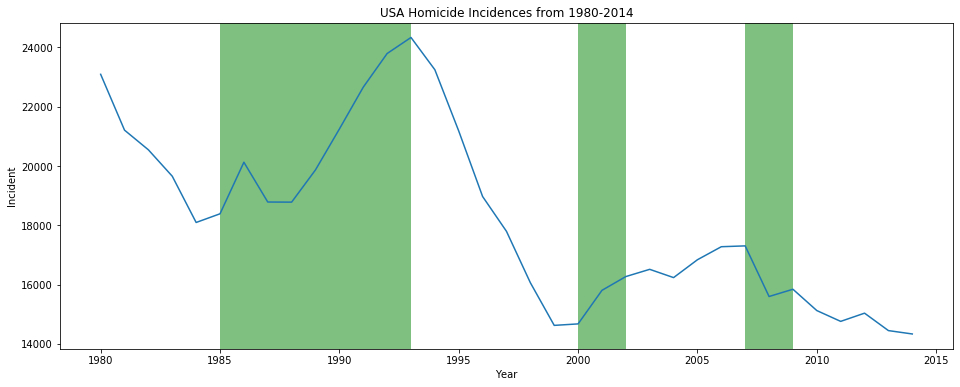

In [6]:
# Group the count of incident by year 
# Reset index for plotting
country_incidences = data2.groupby('Year')['Incident'].agg('count')
country_incidences = country_incidences.reset_index()

# Create a lineplot over for all the years of data
plt.figure(figsize=(16, 6))
sns.lineplot(data=country_incidences, x='Year',y='Incident').set_title("USA Homicide Incidences from 1980-2014")

# mark the financial crises on the graph
plt.axvspan(2000,2002,facecolor='g', alpha=0.5)
plt.axvspan(2007,2009,facecolor='g', alpha=0.5)
plt.axvspan(1985,1993,facecolor='g', alpha=0.5)

Text(0, 0.5, 'Incident')

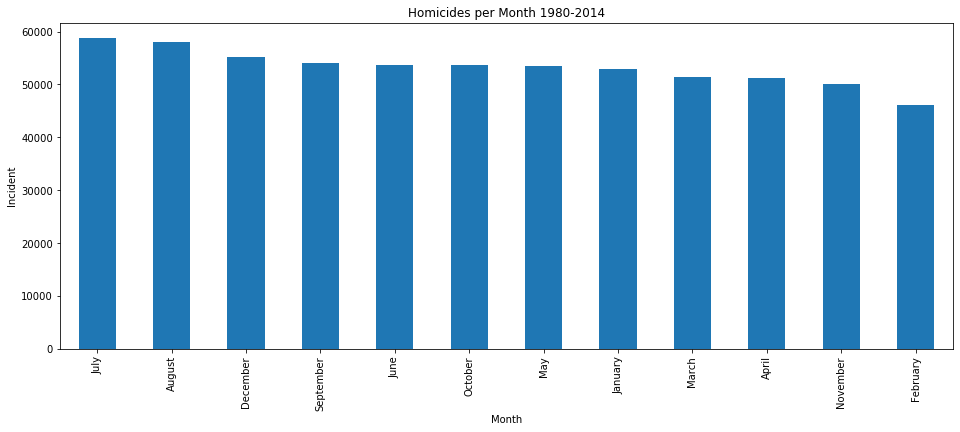

In [7]:
data2['Month'].value_counts().plot(kind='bar',figsize=[16,6],title='Homicides per Month 1980-2014')
plt.xlabel('Month')
plt.ylabel('Incident')

In [8]:
data2['Month'].value_counts()

July         58696
August       58072
December     55187
September    54117
June         53662
October      53650
May          53394
January      52928
March        51444
April        51209
November     50016
February     46079
Name: Month, dtype: int64

Text(0.5, 6.79999999999999, 'Race and Sex')

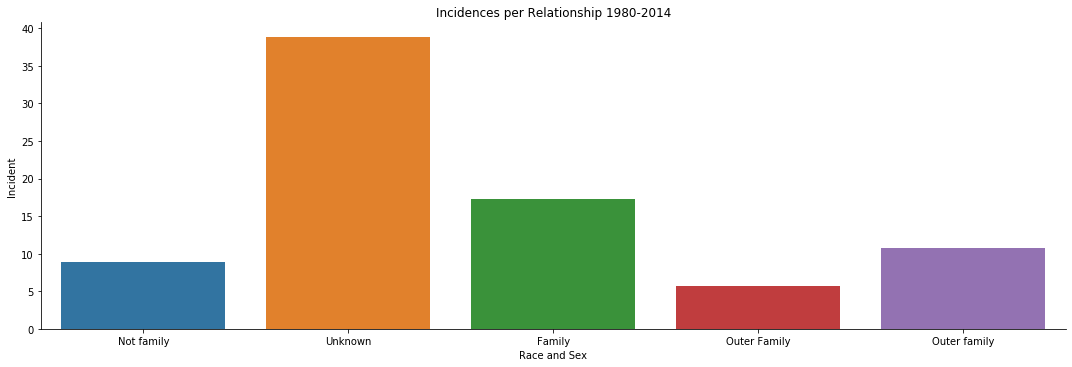

In [9]:
data3 = data2.copy()
replace_map_relationship = {'Acquaintance': 'Not family', 'Unknown': 'Unknown', 'Wife': 'Family', 
                                'Stranger': 'Not family','Girlfriend': 'Outer Family', 'Ex-Husband': 'Family', 
                                'Brother': 'Family' , 'Stepdaughter': 'Family' , 'Husband': 'Family',
                                'Sister': 'Family','Friend': 'Outer family', 'Neighbor': 'Not family', 
                                'Father': 'Family','In-Law': 'Family', 'Son':'Family',
       'Ex-Wife':'Family', 'Boyfriend':'Outer family', 'Mother':'Family', 'Common-Law Husband':'Family',
       'Common-Law Wife':'Family', 'Stepfather':'Family', 'Stepson':'Family', 'Stepmother':'Family',
       'Daughter':'Family', 'Boyfriend/Girlfriend':'Outer family', 'Employer':'Not family', 'Employee':'Not family'
                                }

data3['relationship_group'] = data2['Relationship']
data3['relationship_group'] = data3['relationship_group'].map(replace_map_relationship)

sns.catplot(x='relationship_group',y='Incident',data=data3, kind='bar',aspect=3,ci=None)
plt.title('Incidences per Relationship 1980-2014')
plt.xlabel('Race and Sex')

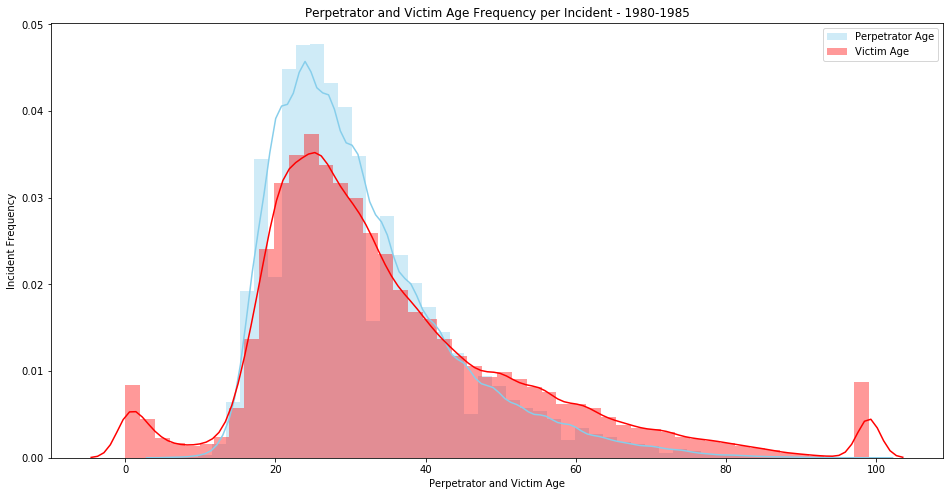

In [10]:
# subset data for the 1980-1985 years
eighties = data2[data2['Year']<=1985]

# subset data for the 2009-2014 years 
modern = data2[data2["Year"]>=2009] 

plt.subplots(figsize=(16, 8))
sns.distplot( eighties["Perpetrator Age"] , color="skyblue", label="Perpetrator Age")
sns.distplot( eighties["Victim Age"] , color="red", label="Victim Age")
plt.title('Perpetrator and Victim Age Frequency per Incident - 1980-1985')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

In [11]:
mode_eighties = eighties["Perpetrator Age"].mode()
print("Most frequent perpetrator age for years 1980-1985: ",mode_eighties,'\n')
mode_eighties_perp = eighties["Victim Age"].mode()
print("Most frequent victim age for years 1980-1985: ",mode_eighties,'\n')
print('Perpetrator age describe: ',eighties["Perpetrator Age"].describe(),'\n')
print('Perpetrator age describe: ',eighties["Victim Age"].describe())

Most frequent perpetrator age for years 1980-1985:  0    25
dtype: int64 

Most frequent victim age for years 1980-1985:  0    25
dtype: int64 

Perpetrator age describe:  count    120976.000000
mean         31.306739
std          11.807745
min           6.000000
25%          23.000000
50%          29.000000
75%          37.000000
max          99.000000
Name: Perpetrator Age, dtype: float64 

Perpetrator age describe:  count    120976.000000
mean         35.075676
std          18.234217
min           0.000000
25%          23.000000
50%          31.000000
75%          43.000000
max          99.000000
Name: Victim Age, dtype: float64


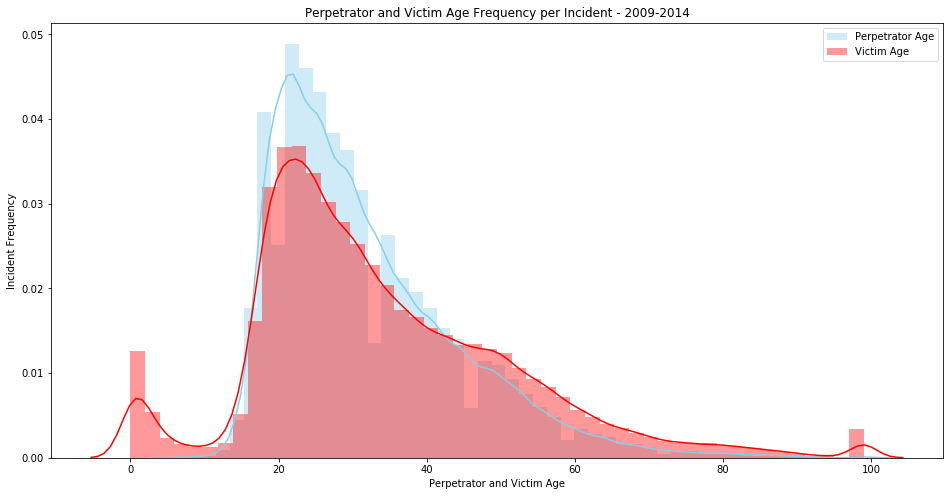

In [12]:
plt.subplots(figsize=(16, 8))
sns.distplot( modern["Perpetrator Age"] , color="skyblue", label="Perpetrator Age")
sns.distplot( modern["Victim Age"] , color="red", label="Victim Age")
plt.title('Perpetrator and Victim Age Frequency per Incident - 2009-2014')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

In [13]:
mode_modern = modern["Perpetrator Age"].mode()
print("Most frequent perpetrator age for years 2009-2014: ",mode_modern,'\n')
mode_modern_perp = modern["Victim Age"].mode()
print("Most frequent victim age for years 2009-2014: ",mode_modern_perp,'\n')
print('Perpetrator age describe: ',modern["Perpetrator Age"].describe(),'\n')
print('Victim age describe: ',modern["Victim Age"].describe())

Most frequent perpetrator age for years 2009-2014:  0    20
dtype: int64 

Most frequent victim age for years 2009-2014:  0    22
dtype: int64 

Perpetrator age describe:  count    89526.000000
mean        31.762840
std         12.427338
min          6.000000
25%         22.000000
50%         29.000000
75%         38.000000
max         99.000000
Name: Perpetrator Age, dtype: float64 

Victim age describe:  count    89526.000000
mean        33.851864
std         17.268654
min          0.000000
25%         22.000000
50%         30.000000
75%         44.000000
max         99.000000
Name: Victim Age, dtype: float64


## Most Common Homicide Weapon

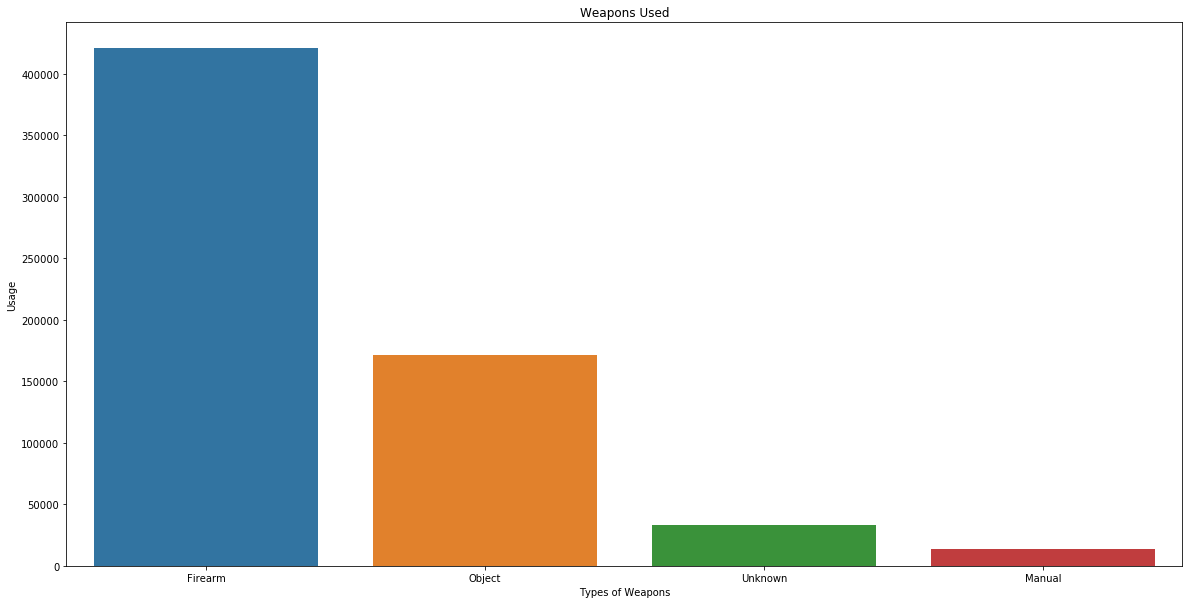

In [14]:
replace_map_weapon = {'Blunt Object': 'Object', 'Unknown': 'Unknown', 'Strangulation': 'Manual', 
                                'Rifle': 'Firearm','Knife': 'Object', 'Firearm': 'Firearm', 
                                'Shotgun': 'Firearm' , 'Fall': 'Manual' , 'Handgun': 'Firearm',
                                'Drowning':'Manual','Suffocation':'Manual','Explosives':'Object',
                                'Fire':'Object','Drugs':'Object','Gun':'Firearm','Poison':'Object'}

data3['weapon_group'] = data2['Weapon']
data3['weapon_group'] = data3['weapon_group'].map(replace_map_weapon)

# count the following subplot and specify the chart size
count, ax = plt.subplots(figsize= (20,10))
# create a countplot of that subplot
ax = sns.countplot('weapon_group', data=data3,order=['Firearm','Object','Unknown','Manual'])
ax.set_title('Weapons Used')
ax.set_xlabel('Types of Weapons')
ax.set_ylabel('Usage')

plt.show()

## Decision Tree
### Can we predict the case will be solved or not based on victim data?

In [15]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score, classification_report,roc_curve,roc_auc_score #Import scikit-learn metrics module for accuracy calculation
import graphviz # lets us display the tree in jupiter
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/home/jupyter-ehren/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Accuracy: 0.8338232299764536 

              precision    recall  f1-score   support

           0       0.66      0.93      0.77     57102
           1       0.96      0.79      0.87    134435

    accuracy                           0.83    191537
   macro avg       0.81      0.86      0.82    191537
weighted avg       0.87      0.83      0.84    191537
 



/home/jupyter-ehren/.local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


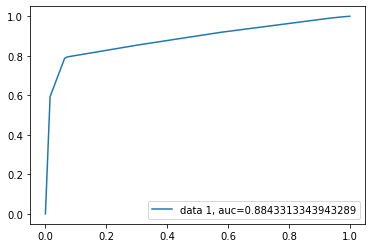

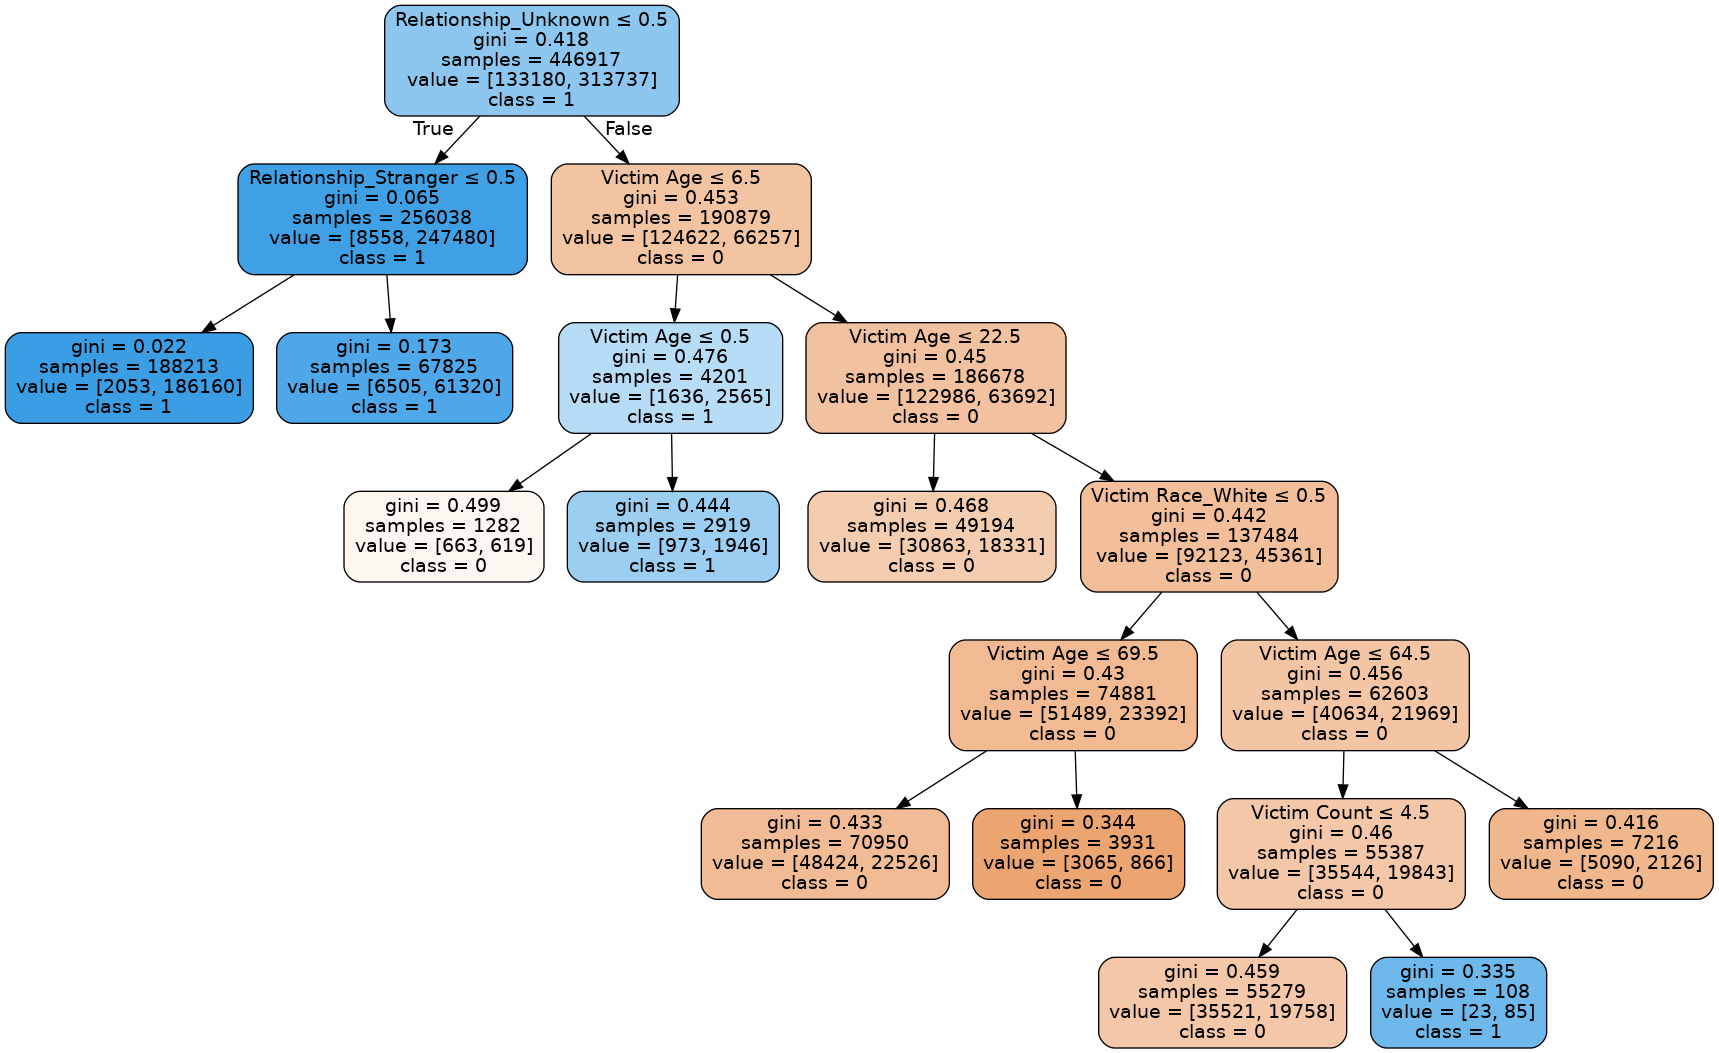

In [16]:
# create a copy of the clean data
data2_onehot = data2.copy()
# convert category value into an new column and assign it a value
data2_onehot = pd.get_dummies(data2_onehot, columns=['Victim Sex','Victim Race','Relationship'], 
                              prefix = ['Victim Sex','Victim Race','Relationship'])

# drop the columns we will not use in the decision tree
dec_tree_cols = data2_onehot.drop(columns=['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Weapon', 'Perpetrator Count', 'Record Source'])

# add a target label we want to predict from clean data to the end of the dataframe
dec_tree_cols['Crime Solved'] = data2['Crime Solved']
# Create a dictionary to replace crimes solved with 1 and not solved with 0 
replace_map = {'Yes': 1,'No':0}
# Use the dictionary on a crimes solved column
dec_tree_cols = dec_tree_cols.replace({"Crime Solved": replace_map})

#split dataset in features and target variable
feature_cols = ['Victim Age', 'Victim Count', 'Victim Sex_Female', 'Victim Sex_Male',
       'Victim Sex_Unknown', 'Victim Race_Asian/Pacific Islander',
       'Victim Race_Black', 'Victim Race_Native American/Alaska Native',
       'Victim Race_Unknown', 'Victim Race_White', 'Relationship_Acquaintance',
       'Relationship_Boyfriend', 'Relationship_Boyfriend/Girlfriend',
       'Relationship_Brother', 'Relationship_Common-Law Husband',
       'Relationship_Common-Law Wife', 'Relationship_Daughter',
       'Relationship_Employee', 'Relationship_Employer',
       'Relationship_Ex-Husband', 'Relationship_Ex-Wife',
       'Relationship_Family', 'Relationship_Father', 'Relationship_Friend',
       'Relationship_Girlfriend', 'Relationship_Husband',
       'Relationship_In-Law', 'Relationship_Mother', 'Relationship_Neighbor',
       'Relationship_Sister', 'Relationship_Son', 'Relationship_Stepdaughter',
       'Relationship_Stepfather', 'Relationship_Stepmother',
       'Relationship_Stepson', 'Relationship_Stranger', 'Relationship_Unknown',
       'Relationship_Wife']
X = dec_tree_cols[feature_cols] # Features
y = dec_tree_cols['Crime Solved'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
# adjust the model size
clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred),'\n')

# print the classification report 
print(classification_report(y_test, y_pred),'\n')

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# StringIO() --> Read and write strings as files
# save it in a variable 
dot_data = StringIO()
# write clf data into a file, out_file = use StringIO() function
# filled = when true paint nodes to indicate majority class for classification, extremity of values for regression,
    # or purity of node for multi-output 
# Rounded = When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman
# When set to True, do not ignore special characters for PostScript compatibility
# feature_names = Names of each of the features (0 and 1 for us)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# convert file to png 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# specify the name of the png file
graph.write_png('./crime_solved.png')
# display the decision tree in jupiter 
Image(graph.create_png())

# Reducing Crime in Hartford, CT
## Is it better to increase funding for the police or education?
### Your Vote Counts!

# Argument for Education Budget Increase

In [17]:
# Subset the data for Hartford
hartford_subset = data2[data2['City'] == 'Hartford']

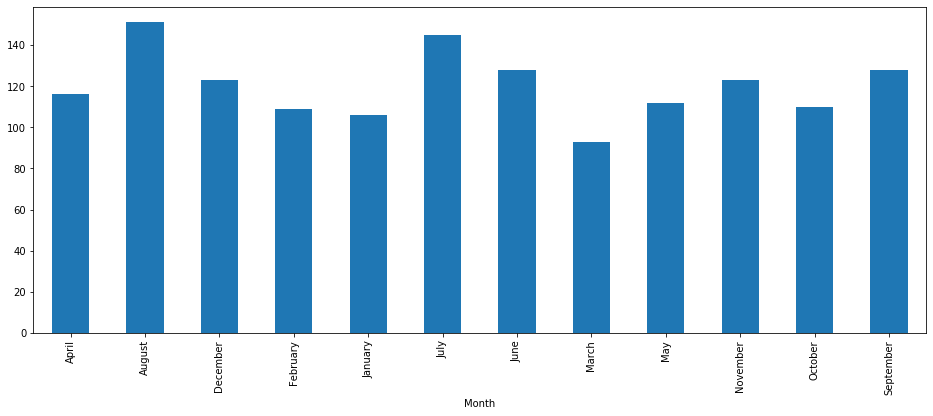

In [18]:
hartford_subset.groupby('Month')['Incident'].agg('count').plot(kind='bar',figsize=[16,6])

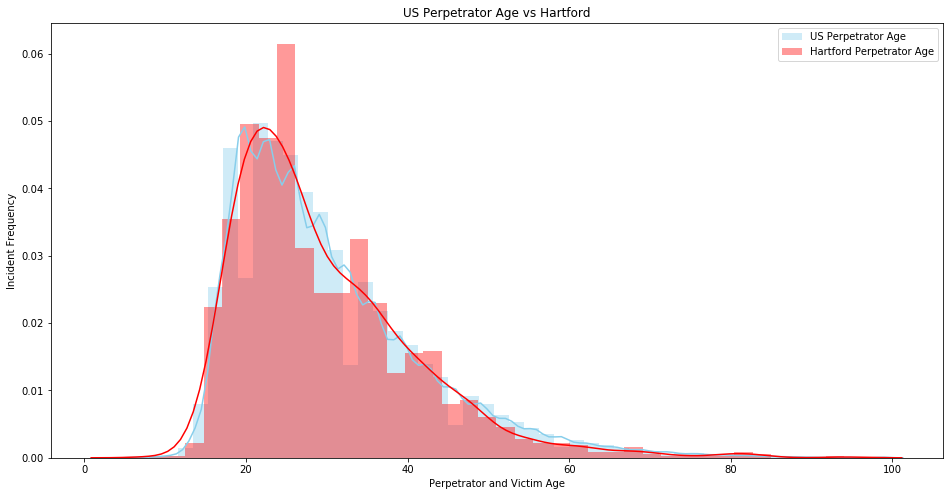

In [19]:
plt.subplots(figsize=(16, 8))
sns.distplot( data2["Perpetrator Age"] , color="skyblue", label="US Perpetrator Age")
sns.distplot( hartford_subset["Perpetrator Age"] , color="red", label="Hartford Perpetrator Age")
plt.title('US Perpetrator Age vs Hartford')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

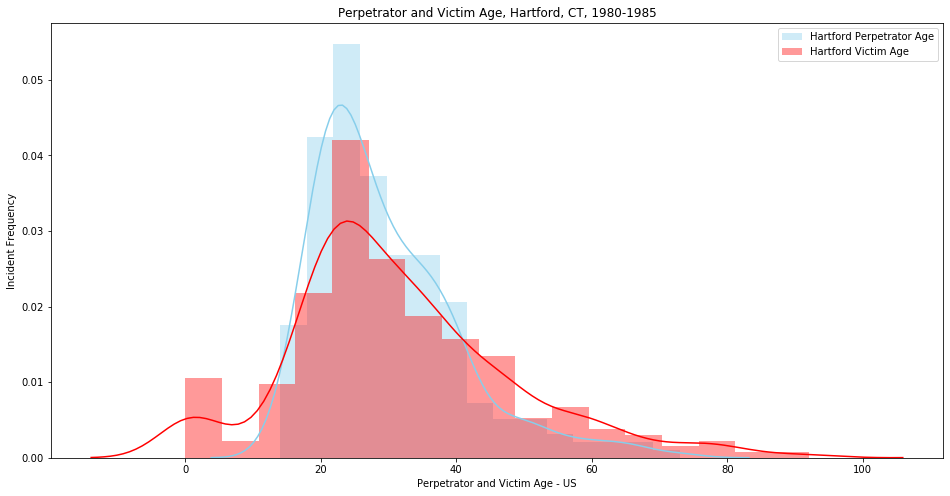

In [20]:
# subset data for the 1980-1985 years
eighties2 = hartford_subset[hartford_subset['Year']<=1985]

# subset data for the 2009-2014 years 
modern2 = hartford_subset[hartford_subset["Year"]>=2009] 

plt.subplots(figsize=(16, 8))
sns.distplot( eighties2["Perpetrator Age"] , color="skyblue", label="Hartford Perpetrator Age")
sns.distplot( eighties2["Victim Age"] , color="red", label="Hartford Victim Age")
plt.title('Perpetrator and Victim Age, Hartford, CT, 1980-1985')
plt.xlabel('Perpetrator and Victim Age - US')
plt.ylabel('Incident Frequency')
plt.legend()

In [21]:
mode_eighties2 = eighties2["Perpetrator Age"].mode()
print("Most frequent perpetrator age for years 1980-1985: ",mode_eighties2,'\n')
mode_eighties_perp2 = eighties2["Victim Age"].mode()
print("Most frequent victim age for years 1980-1985: ",mode_eighties_perp2,'\n')
print('Perpetrator age describe: ',eighties2["Perpetrator Age"].describe(),'\n')
print('Victim age describe: ',eighties2["Victim Age"].describe())

Most frequent perpetrator age for years 1980-1985:  0    21
dtype: int64 

Most frequent victim age for years 1980-1985:  0    22
1    24
dtype: int64 

Perpetrator age describe:  count    246.000000
mean      29.540650
std       10.678052
min       14.000000
25%       22.000000
50%       27.000000
75%       35.000000
max       73.000000
Name: Perpetrator Age, dtype: float64 

Victim age describe:  count    246.000000
mean      31.581301
std       16.553423
min        0.000000
25%       22.000000
50%       29.000000
75%       39.750000
max       92.000000
Name: Victim Age, dtype: float64


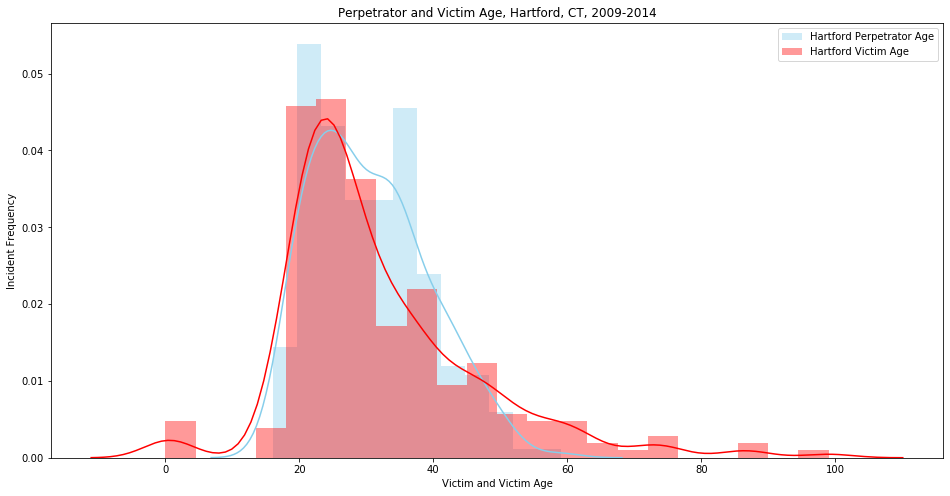

In [22]:
plt.subplots(figsize=(16, 8))
sns.distplot( modern2["Perpetrator Age"] , color="skyblue", label="Hartford Perpetrator Age")
sns.distplot( modern2["Victim Age"] , color="red", label="Hartford Victim Age")
plt.title('Perpetrator and Victim Age, Hartford, CT, 2009-2014')
plt.xlabel('Victim and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

In [23]:
mode_modern2 = modern2["Perpetrator Age"].mode()
print("Most frequent perpetrator age for years 2009-2014: ",mode_modern2,'\n')
mode_modern_perp2 = modern2["Victim Age"].mode()
print("Most frequent victim age for years 2009-2014: ",mode_modern_perp2,'\n')
print('Perpetrator age describe: ',modern2["Perpetrator Age"].describe(),'\n')
print('Victim age describe: ',modern2["Victim Age"].describe())

Most frequent perpetrator age for years 2009-2014:  0    26
dtype: int64 

Most frequent victim age for years 2009-2014:  0    24
dtype: int64 

Perpetrator age describe:  count    233.000000
mean      30.557940
std        8.586143
min       16.000000
25%       24.000000
50%       29.000000
75%       36.000000
max       59.000000
Name: Perpetrator Age, dtype: float64 

Victim age describe:  count    233.000000
mean      31.815451
std       14.553271
min        0.000000
25%       23.000000
50%       28.000000
75%       37.000000
max       99.000000
Name: Victim Age, dtype: float64


Text(0.5, 6.79999999999999, 'Relationship Groups')

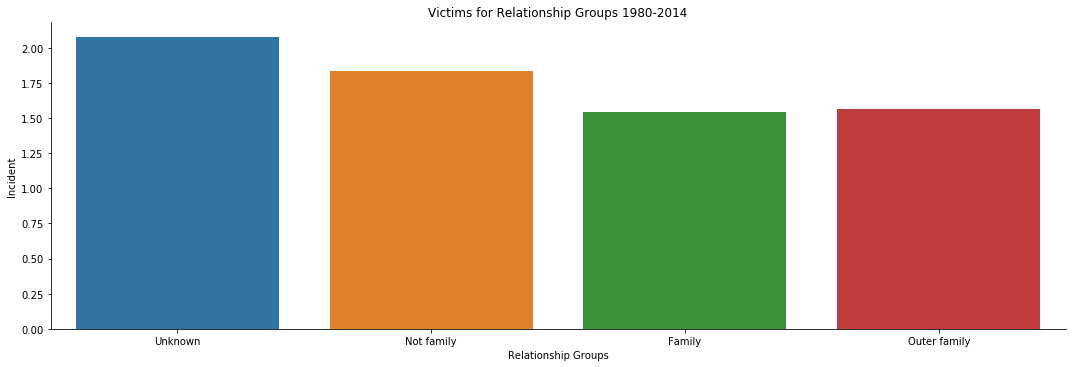

In [24]:
hartford = hartford_subset.copy()

replace_map_relationship2 = {'Acquaintance': 'Not family', 'Unknown': 'Unknown', 'Wife': 'Family', 
                                'Stranger': 'Not family','Girlfriend': 'Outer family', 'Ex-Husband': 'Family', 
                                'Brother': 'Family' , 'Stepdaughter': 'Family' , 'Husband': 'Family',
                                'Sister': 'Family','Friend': 'Outer family', 'Neighbor': 'Not family', 
                                'Father': 'Family','In-Law': 'Family', 'Son':'Family',
       'Ex-Wife':'Family', 'Boyfriend':'Outer family', 'Mother':'Family', 'Common-Law Husband':'Family',
       'Common-Law Wife':'Family', 'Stepfather':'Family', 'Stepson':'Family', 'Stepmother':'Family',
       'Daughter':'Family', 'Boyfriend/Girlfriend':'Outer family', 'Employer':'Not family', 'Employee':'Not family'
                                }

hartford['relationship_group'] = data2['Relationship']
hartford['relationship_group'] = hartford['relationship_group'].map(replace_map_relationship2)

sns.catplot(x='relationship_group',y='Incident',data=hartford, kind='bar',aspect=3,ci=None)
plt.title('Victims for Relationship Groups 1980-2014')
plt.xlabel('Relationship Groups')

Text(0, 0.5, 'Value Counts')

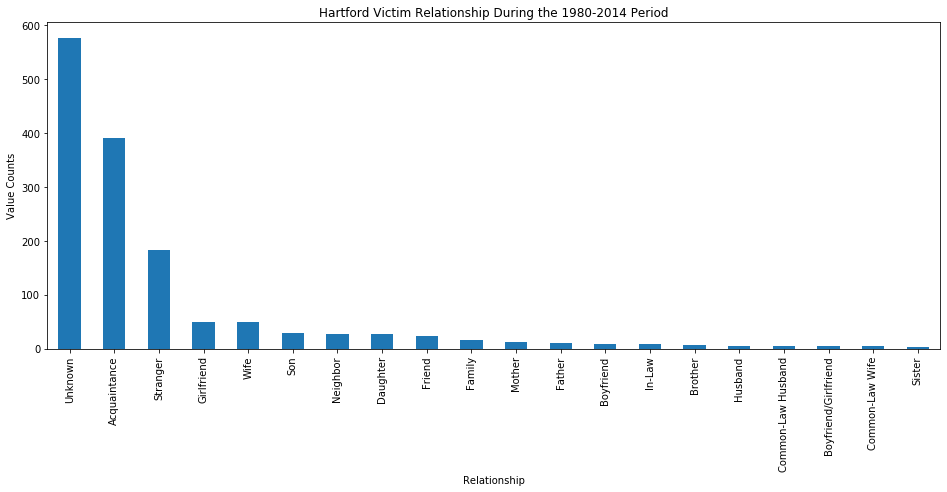

In [25]:
hartford['Relationship'].value_counts().head(20).plot(kind='bar',figsize=[16,6])
plt.title('Hartford Victim Relationship During the 1980-2014 Period')
plt.xlabel('Relationship')
plt.ylabel('Value Counts')

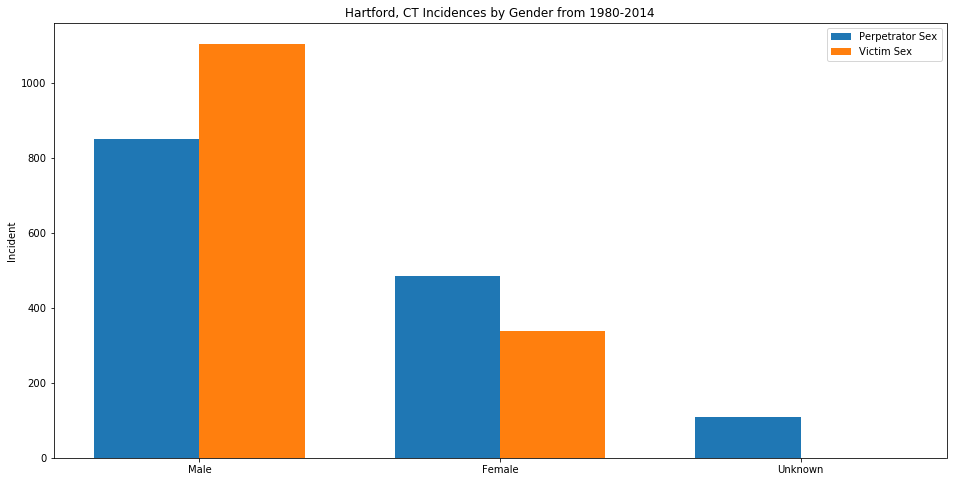

In [26]:
import numpy as np

#finds perpetrator count of men and women 
hartford_subset_malevsfemale_p = hartford_subset.groupby('Perpetrator Sex')['Incident'].agg('count')
hartford_subset_malevsfemale_p = hartford_subset_malevsfemale_p.reset_index().sort_values('Incident',ascending=False)
hartford_subset_malevsfemale_v = hartford_subset.groupby('Victim Sex')['Incident'].agg('count')
hartford_subset_malevsfemale_v = hartford_subset_malevsfemale_v.reset_index().sort_values('Incident',ascending=False)

plt.subplots(figsize=(16, 8))
N = 3
perp_sex = hartford_subset_malevsfemale_p['Incident']
women_sex = hartford_subset_malevsfemale_v['Incident']

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, perp_sex, width, label='Perpetrator Sex')
plt.bar(ind + width, women_sex, width,
    label='Victim Sex')

plt.ylabel('Incident')
plt.title('Hartford, CT Incidences by Gender from 1980-2014')

plt.xticks(ind + width / 2, ('Male', 'Female', 'Unknown'))
plt.legend(loc='best')
plt.show()

# Argument for Police Budget Increase

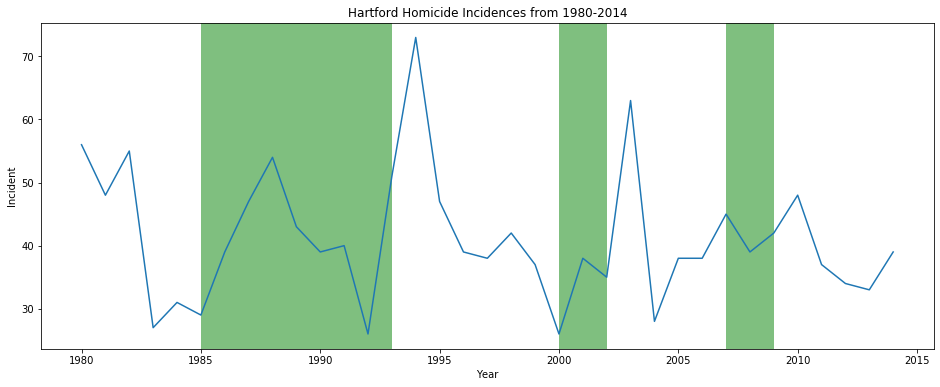

In [27]:
# Group the count of incident by year 
# Reset index for plotting
hartford_incidences = hartford_subset.groupby('Year')['Incident'].agg('count')
hartford_incidences = hartford_incidences.reset_index()

# Create a lineplot over for all the years of data
plt.figure(figsize=(16, 6))
sns.lineplot(data=hartford_incidences, x='Year',y='Incident').set_title("Hartford Homicide Incidences from 1980-2014")

# mark the financial crises on the graph
plt.axvspan(2000,2002,facecolor='g', alpha=0.5)
plt.axvspan(2007,2009,facecolor='g', alpha=0.5)
plt.axvspan(1985,1993,facecolor='g', alpha=0.5)

Text(0, 0.5, 'Incident Count')

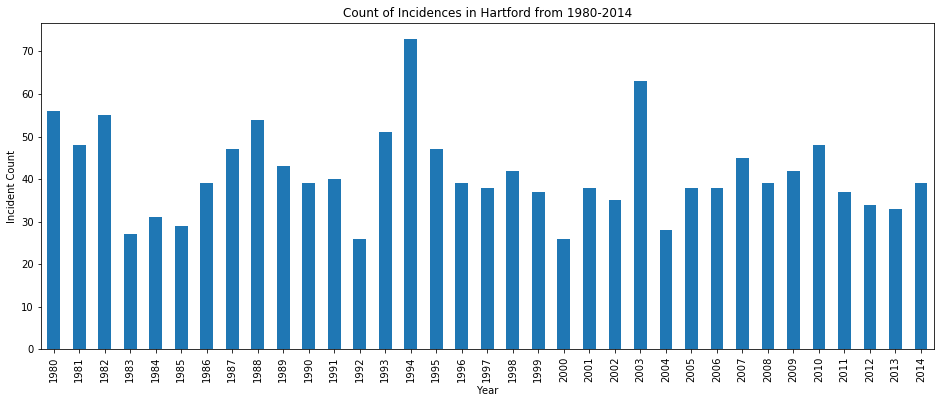

In [28]:
hartford_subset.groupby('Year')['Incident'].agg('count').plot(kind='bar',figsize=[16,6])
plt.title('Count of Incidences in Hartford from 1980-2014')
plt.ylabel('Incident Count')

Text(0, 0.5, 'Count')

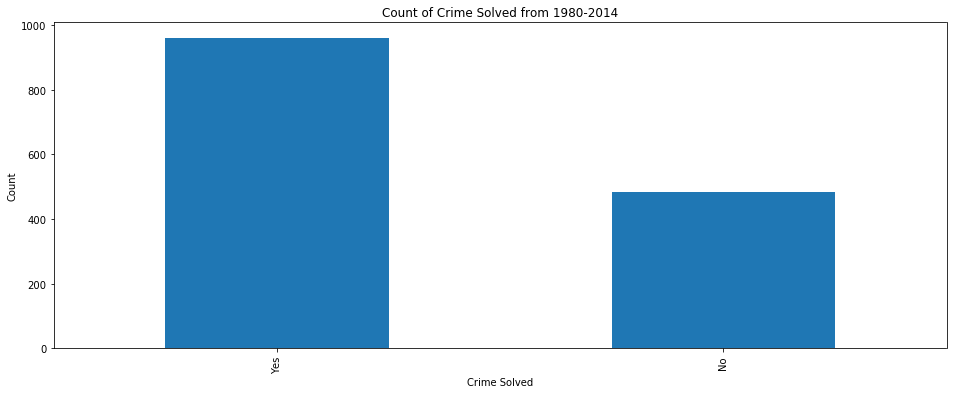

In [29]:
hartford_subset['Crime Solved'].value_counts().plot(kind='bar',figsize=[16,6])
plt.title('Count of Crime Solved from 1980-2014')
plt.xlabel('Crime Solved')
plt.ylabel('Count')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


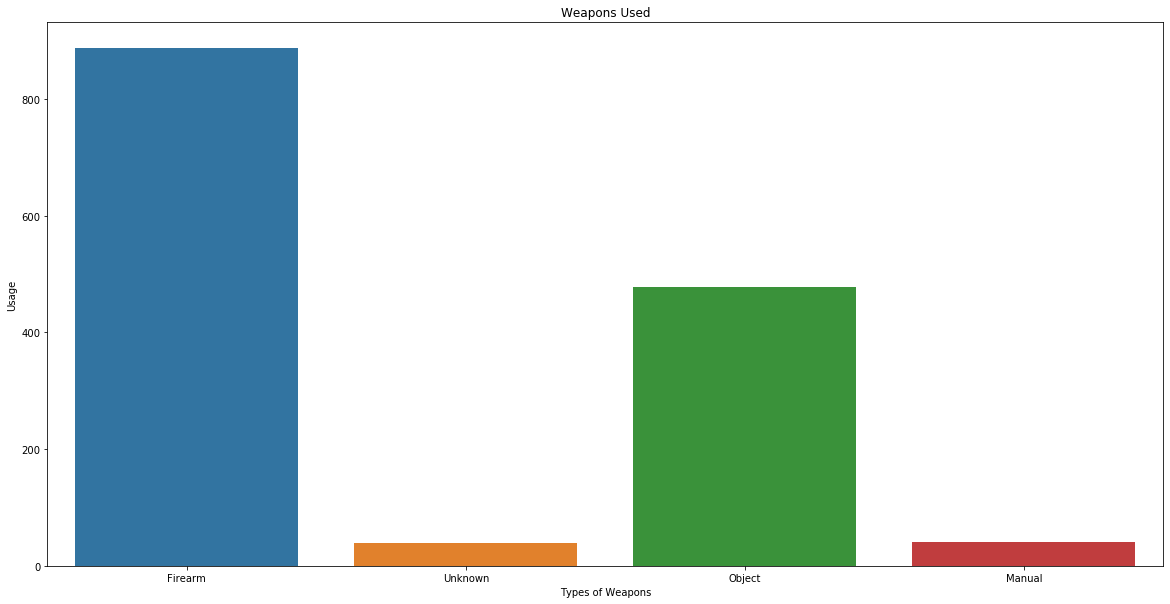

In [30]:
replace_map_weapon2 = {'Blunt Object': 'Object', 'Unknown': 'Unknown', 'Strangulation': 'Manual', 
                                'Rifle': 'Firearm','Knife': 'Object', 'Firearm': 'Firearm', 
                                'Shotgun': 'Firearm' , 'Fall': 'Manual' , 'Handgun': 'Firearm',
                                'Drowning':'Manual','Suffocation':'Manual','Explosives':'Object',
                                'Fire':'Object','Drugs':'Object','Gun':'Firearm','Poison':'Object'}

hartford_subset['weapon_group'] = data2['Weapon']
hartford_subset['weapon_group'] = hartford_subset['weapon_group'].map(replace_map_weapon)

# count the following subplot and specify the chart size
count, ax = plt.subplots(figsize= (20,10))
# create a countplot of that subplot
ax = sns.countplot('weapon_group', data=hartford_subset)
ax.set_title('Weapons Used')
ax.set_xlabel('Types of Weapons')
ax.set_ylabel('Usage')

plt.show()

# Thank You! Questions?
<center><img src="https://media.giphy.com/media/9Jcw5pUQlgQLe5NonJ/giphy.gif" width="600" height="200" /></center>